In [1]:
import my_plotting
import markers
import importlib
import utils
import covax_constants
import CovidVAX_specific_utils
import GeneModules
import better_plotting

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy import stats
import numpy as np

import warnings
# warnings.simplefilter("ignore")

from functools import partial
import scanpy as sc
import anndata

In [4]:
# Short list
genes_dict = {
	'High Specific' : ['APOL3', 'CAMK2D', 'DYSF', 'FARP2', 'FRMD3', 'GBP1', 'GBP2', 'GBP5', 'LIMK2', 'MYOF', 'NCF1', 'PSMB9', 'SAMD4A', 'SECTM1', 'WARS'],
	'High and Dim' : ['ADAR', 'DDX60', 'EPSTI1', 'IFI16', 'IFIH1', 'PARP14', 'PARP9', 'RNF213', 'SMCHD1', 'SP110', 'STAT2', 'TRIM22', 'ZC3HAV1'],
	'Dim Specific' : ['COA1', 'DDX58', 'EIF2AK2', 'IFI44', 'IFI44L', 'ITSN1', 'KIAA1958', 'MX1', 'MX2', 'TENT5A', 'ZCCHC2'],
	'Dim and Low' : ['F13A1', 'LDLRAD4', 'NLRP12', 'SSBP2', 'TIAM1', 'TMEM71'], # FAM13A
}

# our CD14

In [6]:
our_cd14 = sc.read_h5ad('Monocyte CD14-2.h5ad')

In [7]:
our_cd14.obs['subsets'] = pd.Categorical(our_cd14.obs['new_subset_annotations_2'].map({
    'Monocyte CD14': 'CD14 ISG Low',
    'Monocyte CD14 ISG 1': 'CD14 ISG High',
    'Monocyte CD14 ISG 2': 'CD14 ISG High',
    'Monocyte CD14 ISG (Low)': 'CD14 ISG Dim',
    'Monocyte CD14 ISG Inflamm.': 'CD14 ISG High',
}),  categories=['CD14 ISG Low', 'CD14 ISG Dim', 'CD14 ISG High'])

In [8]:
our_cd14.obs['subset_vax'] = utils.make_combined_column(our_cd14, ['subsets', 'Vaccine'])
our_cd14.obs['subset_vax'] = pd.Categorical(our_cd14.obs['subset_vax'], categories=['CD14 ISG High J&J', 'CD14 ISG High Moderna', 'CD14 ISG High Pfizer',
                                                                                  'CD14 ISG Dim J&J', 'CD14 ISG Dim Moderna', 'CD14 ISG Dim Pfizer',
                                                                                  'CD14 ISG Low J&J', 'CD14 ISG Low Moderna', 'CD14 ISG Low Pfizer'])

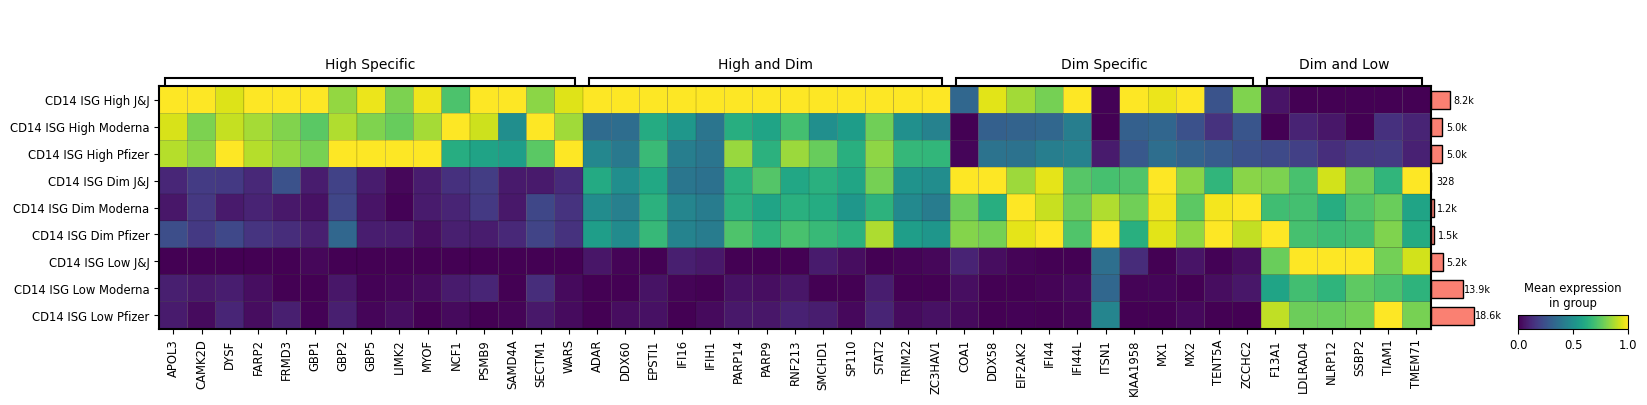

In [11]:
mp = sc.pl.matrixplot(our_cd14, 
              genes_dict,
              groupby = 'subset_vax', 
              standard_scale = 'var',
              var_group_rotation = 0,
              return_fig=True
             )

mp.add_totals().style(edge_color='black').show()
fig = mp.fig
# my_plotting.savefig_png_eps(fig, 'cd14_subsets_isg_matrixplot', make_folder=True, use_timestamp=False)

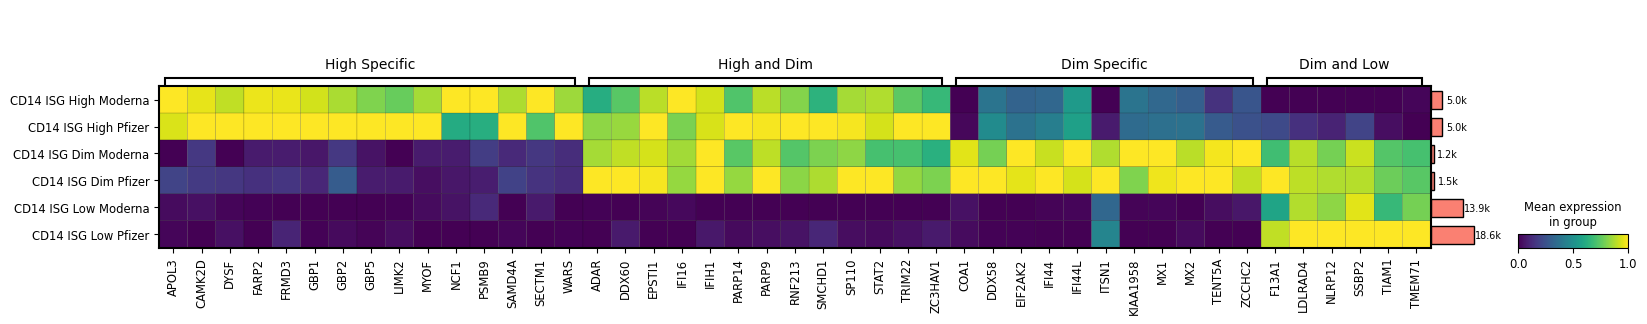

In [11]:
mp = sc.pl.matrixplot(our_cd14[our_cd14.obs['Vaccine']!='J&J'], 
              genes_dict,
              groupby = 'subset_vax', 
              standard_scale = 'var',
              var_group_rotation = 0,
              return_fig=True
             )

mp.add_totals().style(edge_color='black').show()
fig = mp.fig
# my_plotting.savefig_png_eps(fig, 'cd14_subsets_isg_matrixplot', make_folder=True, use_timestamp=False)

# CD14

In [3]:
adata = sc.read_h5ad('CD14-1_1.h5ad')

In [4]:
adata.obs['subsets'] = pd.Categorical('CD14 ' + adata.obs['subsets'].astype(str), categories=['CD14 ISG High', 'CD14 ISG Dim', 'CD14 ISG Low'])

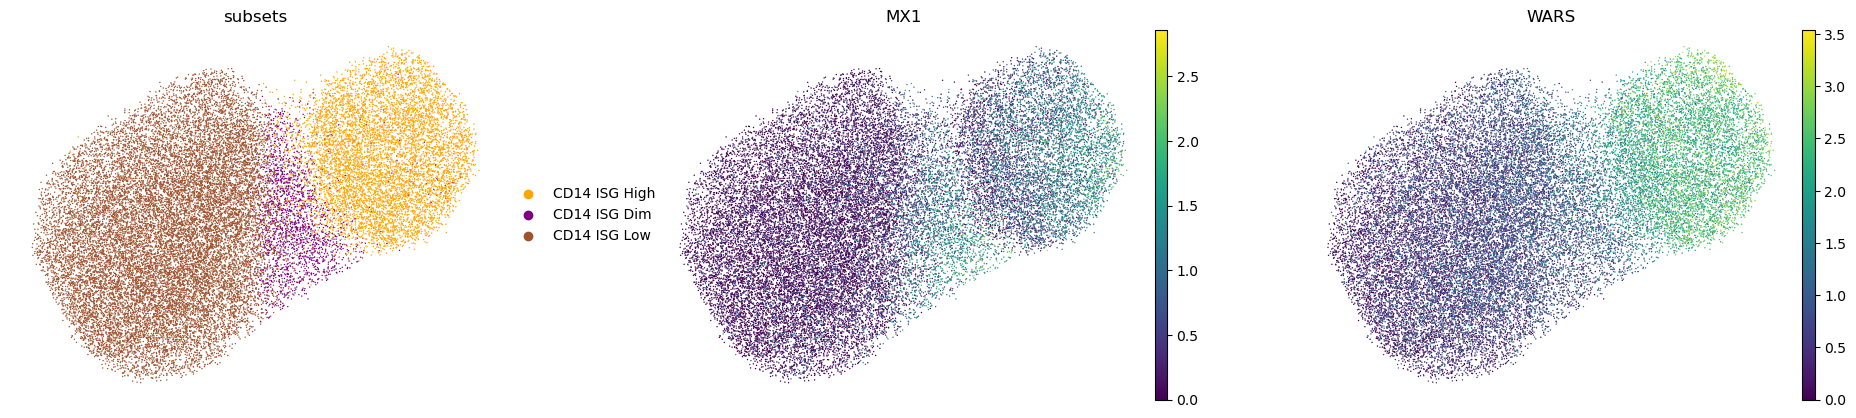

In [5]:
palette = {'CD14 ISG Low': 'sienna', 'CD14 ISG Dim': 'purple', 'CD14 ISG High': 'orange'}
sc.pl.umap(adata, color = ['subsets', 'MX1', 'WARS'], frameon=False, wspace = 0.2, layer='normalized', palette=palette)

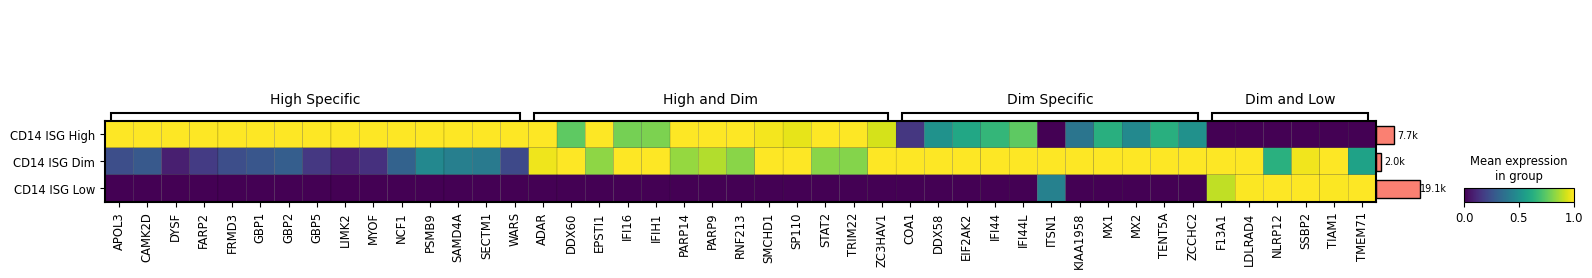

In [6]:
mp = sc.pl.matrixplot(adata, 
              genes_dict, 
              groupby = 'subsets', 
              standard_scale = 'var',
              return_fig=True,
              var_group_rotation = 0,
             )

mp.add_totals().style(edge_color='black').show()
fig = mp.fig
# my_plotting.savefig_png_eps(fig, 'balis_cd14_subsets_isg_matrixplot', make_folder=True, use_timestamp=False)

# DC (cDC2)

In [16]:
dc = sc.read_h5ad('cDC2-1-c.h5ad')

In [17]:
dc.X = dc.layers['normalized'].copy()

In [18]:
dc.obs['subsets'] = pd.Categorical(dc.obs['subsets_2'].map({
    'cDC2': 'cDC2 ISG Low',
    'cDC2 ISG Dim': 'cDC2 ISG Dim',
    'cDC2 ISG High': 'cDC2 ISG High'
}), categories=['cDC2 ISG High', 'cDC2 ISG Dim', 'cDC2 ISG Low'])

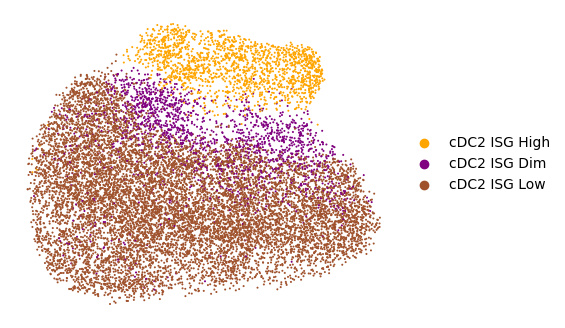

In [19]:
fig, ax = plt.subplots(dpi = 100, figsize = (5, 4))
palette = {'cDC2 ISG Low': 'sienna', 'cDC2 ISG Dim': 'purple', 'cDC2 ISG High': 'orange'}
sc.pl.umap(dc, color = ['subsets'], frameon=False, ax = ax, show = False, palette=palette)
ax.set_title(None);


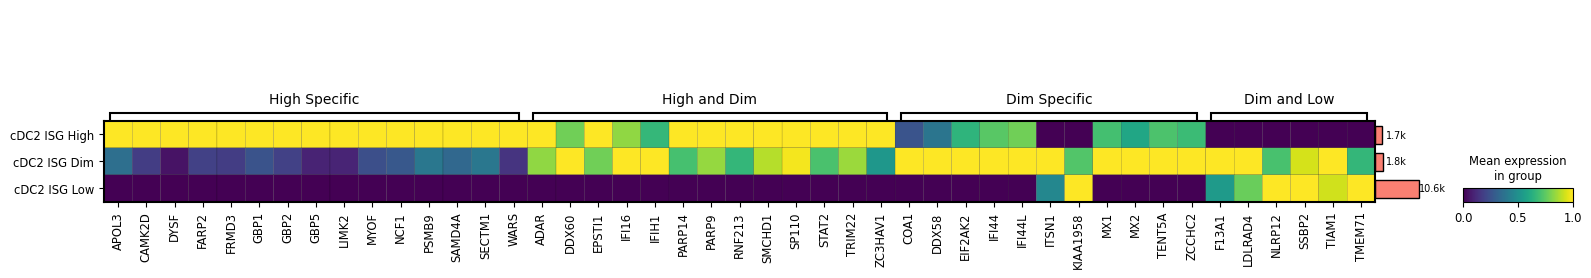

In [20]:
mp = sc.pl.matrixplot(dc, 
              genes_dict, 
              groupby = 'subsets', 
              var_group_rotation = 0,
              standard_scale = 'var',
              return_fig=True,
             )

mp.add_totals().style(edge_color='black').show()
fig = mp.fig
my_plotting.savefig_png_eps(fig, 'balis_cdc2_subsets_isg_matrixplot', make_folder=True, use_timestamp=False)

# CD16

In [21]:
cd16 = sc.read_h5ad('CD16.h5ad')

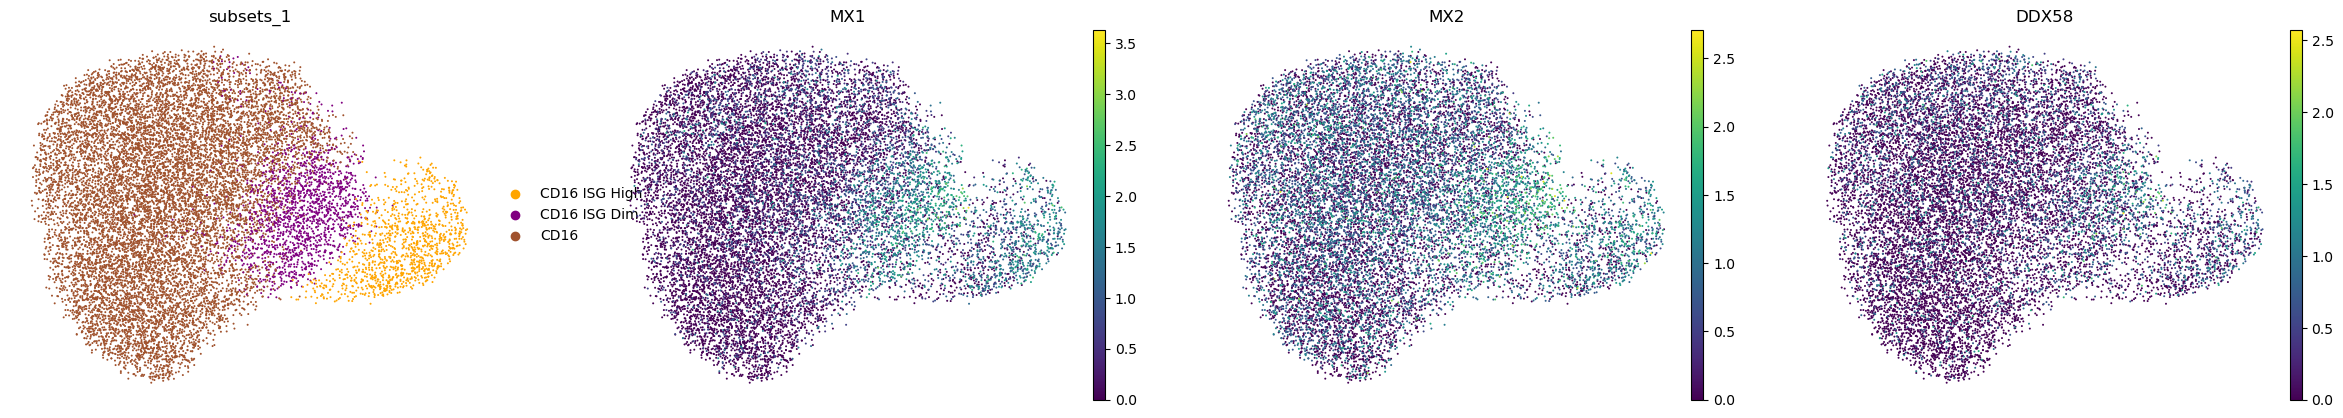

In [23]:
palette = {'CD16': 'sienna', 'CD16 ISG Dim': 'purple', 'CD16 ISG High': 'orange'}
sc.pl.umap(cd16, color = ['subsets_1', 'MX1', 'MX2', 'DDX58'], layer='normalized', frameon=False, palette=palette)

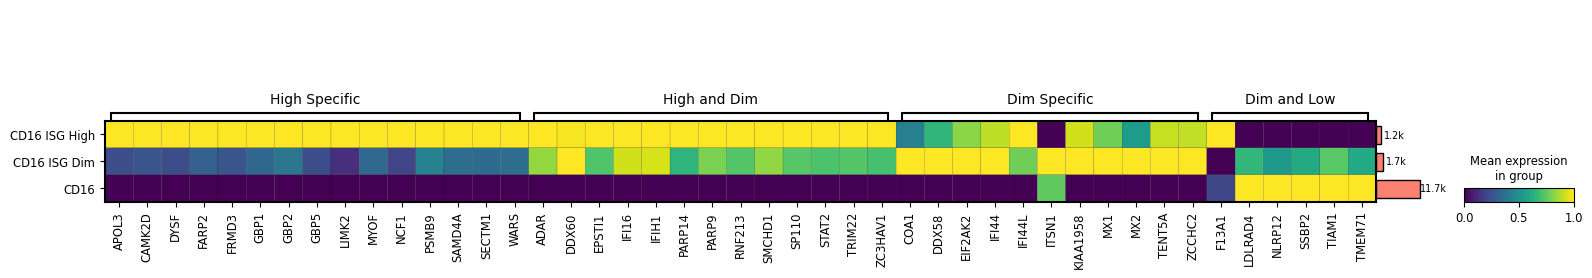

In [24]:
mp = sc.pl.matrixplot(cd16, 
              genes_dict, 
              groupby = 'subsets_1', 
              var_group_rotation = 0,
              standard_scale = 'var',
              return_fig=True,
             )

mp.add_totals().style(edge_color='black').show()
fig = mp.fig